The solution for kr>0 is derived in M3.1 Benchmarking problem, here a plot for small $kr$.

For constant $ \psi_s $,  $kr$ and $kz$ we can solve above equation yielding the analytical solution

$$ \psi_r(l) := \psi_s + d_1 e^{\tau l } + d_2 e^{-\tau l} $$

$\tau$, $d1$, and $d2$ defined below

[ 7.30124765 -6.80124765]
radial_flux 0.0005432677213426098
top -200.0 bot -436.3445893410018


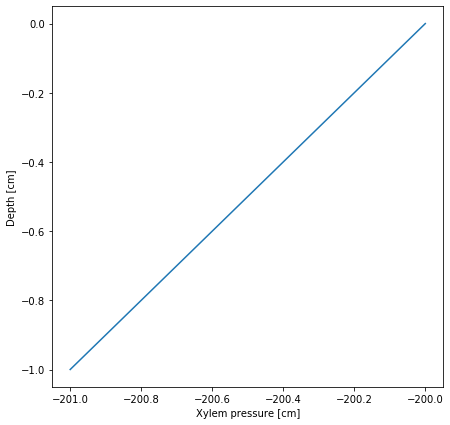

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import *

L = 1 # length of single straight root [cm]
a = 0.2 # radius  [cm]
kx = 0.0432 # axial conductivity [cm^3 / day] 
kr = 1.73e-4 # radial conductivity [1 / day]
psi_s = -200.5 # constant soil matric potential [cm]
psi_i = -200 - psi_s # matric potential at node i [cm]
psi_j = -201 - psi_s # matric potential at node j [cm]

tau = np.sqrt(2*a*np.pi*kr/kx)

# Boundary conditions
AA = np.array([[1,1], [exp(tau*(-L)), exp(-tau*(-L))] ]) 
bb = np.array([psi_i, psi_j]) 
d = np.linalg.solve(AA, bb) 
print(d)

# Analytical solution
p_r = lambda z: psi_s + d[0]*exp(tau*z) + d[1]*exp(-tau*z)

delta = exp(-tau*L)-exp(tau*L)
radial_flux = 2*pi*kr*(1/(tau*delta))*(2-exp(-tau*L)-exp(tau*L))
print("radial_flux", radial_flux)

print("top", p_r(0), "bot", p_r(-50))

# Plot results
fig=plt.figure(figsize=(7, 7))
za_ = np.linspace(0,-L,1000)
pr = list(map(p_r, za_))
plt.plot(pr,za_)
plt.xlabel("Xylem pressure [cm]")
plt.ylabel("Depth [cm]")
plt.show()

If we insert $kr=0$ into above equations (that were derived for $kr>0$), we cannot solver for $d$ since the matrix is singular.  

For $kr=0$, $\psi_r$ takes the form
$$ \psi_r(l) := \psi_s + c_2 l + c_1 $$
i.e. a straight line, and the resulting net flux is exactly the axial flux. 

In case of $kr=0$ segment net fluxes must be either replaced the axial flux (exact or approach) or approximated by some small $kr$ (should be sufficient).  